# Data-analytiikan osaaja

## Koulutus: 13.2.2020-14.2.2020

# Aihe: Pääkomponenttianalyysi (PCA)

Lataa seuraava tiedosto: THL_MyData2016_hackathon_dataset.xls Datasta kerrotaan enemmän THL:n kotisivuilla osoitteessa: https://thl.fi/en/web/thlfi-en/statistics/statistical-databases/open-data/thl-and-hackathons 
    
Valitse ne sarakkeet joissa on numeerisia arvoja. Voit valita Pandas DataFrame muuttujasta my_frame sarakkeet 'a' ja 'b' seuraavalla komennolla:

another_dataframe = my_frame[['a','b']]

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
health_data = pd.read_excel("THL_MyData2016_hackathon_dataset.xls")

In [3]:
type(health_data)

pandas.core.frame.DataFrame

In [4]:
health_data.columns

Index(['ikalk', 'sp', 'bmi', 'systbp2', 'diastbp2', 'kol', 'kol_hdl',
       'Fx_plus', 'Fx'],
      dtype='object')

In [5]:
numeric_health_data = health_data[['bmi','systbp2', 'diastbp2','kol','kol_hdl']]

In [6]:
type(numeric_health_data)

pandas.core.frame.DataFrame

In [7]:
numeric_health_data.describe()

,bmi,systbp2,diastbp2,kol,kol_hdl
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,27.109074,132.042912,78.334268,5.270606,1.482348
std,4.506711,17.805731,10.534951,0.995119,0.362748
min,16.530000,88.000000,45.770000,2.550000,0.700000
25%,23.940000,120.000000,72.000000,4.567500,1.220000
50%,26.540000,130.000000,78.000000,5.235000,1.440000
75%,29.707500,142.000000,86.000000,5.912500,1.710000
max,45.180000,200.630000,109.370000,8.830000,2.850000


In [8]:
numeric_health_data

,bmi,systbp2,diastbp2,kol,kol_hdl
0,16.53,104.40,58.00,3.42,0.77
1,17.43,105.57,60.00,3.48,0.85
2,19.33,106.00,63.80,3.52,0.88
3,20.74,107.90,66.00,3.57,0.89
4,20.88,108.00,68.00,3.63,0.92
...,...,...,...,...,...
1183,34.89,179.00,90.00,7.38,2.19
1184,35.87,183.12,90.89,7.53,2.21
1185,38.05,190.00,92.61,7.86,2.22
1186,38.92,190.00,93.56,7.95,2.30


Pääkomponenttianalyysin kirjastofunktio kuvattu täällä:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [9]:
# Normalisoidaan data käyttäen kirjastofunktiota:

# Luodaan objekti:
my_scaler = StandardScaler()
# Sovitetaan dataan:
my_scaler = my_scaler.fit(numeric_health_data)

# Tee muunnos, nyt keskiarvo on 0 ja varianssi 1:
normalized_health_data = my_scaler.transform(numeric_health_data)

# Luodaan PCA malli:
pca_malli = PCA(n_components=4)

# Sovitetaan dataan:
pca_malli.fit(normalized_health_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Nyt pääkomponenttianalyysista saatua mallia voidaan käyttää datan projisoimiseksi matalaulotteisempaan avaruuteen. Aluksi data oli neliulotteista (neljä muuttujaa), projisoidaan tasoon (kahteen muuttujaan). Tämä on niinkutsuttu dimensionaalisuuden reduktio tai vähennys.

array([[ 0.45899292,  0.43698676,  0.43590524,  0.4627231 ,  0.44072898],
       [ 0.22952015,  0.66413166, -0.67016799, -0.23849101,  0.01570166],
       [-0.1565962 , -0.34848461, -0.41075126,  0.0872851 ,  0.82322586],
       [ 0.81904254, -0.44104427, -0.0264584 , -0.36595237, -0.00530088]])

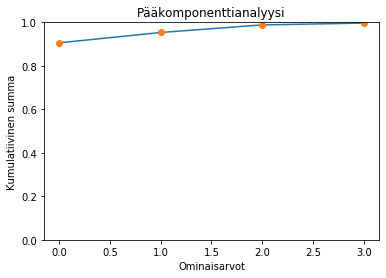

In [47]:
health_projected = pca_malli.fit_transform(normalized_health_data)
# Projoisoidun datan koko:
health_projected.shape

# Tehdään kuvaaja ominaisarvojen kumulatiivisesta summasta:
scree_plot = np.cumsum(pca_malli.explained_variance_ratio_)
plt.plot(scree_plot)
plt.plot(scree_plot, 'o')
plt.ylim(0,1)
plt.xlabel('Ominaisarvot')
plt.ylabel('Kumulatiivinen summa')
plt.title('Pääkomponenttianalyysi')

# Katso pääkomponenttien suuntaa alkuperäisen datan avaruudessa
# vaakavektorit ovat pääkomponetteja:
pca_malli.components_

Text(0, 0.5, 'Toinen pääkomponentti')

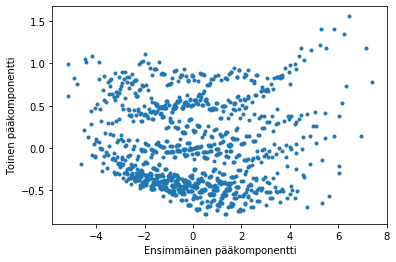

In [11]:
# Otamme vain kaksi ensimmäistä komponenttia:
plt.plot(health_projected[:,0],health_projected[:,1],'.')
plt.xlabel('Ensimmäinen pääkomponentti')
plt.ylabel('Toinen pääkomponentti')

Harjoitus: korvaa MyBad terveysdata jollain muulla datalla, normalisoi data ja sovella PCA:ta. Tarkastele ominaisarvojen kumulatiivista summaa ja mieti miten hyvin datan dimensiota voi vähentää.

In [21]:
pca_malli.explained_variance_ratio_

array([0.90589576, 0.0475462 , 0.03482891, 0.00843117])

In [24]:
ex_variance = np.var(health_projected, axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

array([0.90889325, 0.04770353, 0.03494416, 0.00845907])

In [36]:
from sklearn.datasets import load_wine

wine_x, wine_y = load_wine(return_X_y=True)
wine_df = pd.DataFrame(wine_x)

In [37]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [38]:
scaler_wine = StandardScaler()
scaler_wine = scaler_wine.fit(wine_df)

wine_normalized = scaler_wine.transform(wine_df)

wine_pca = PCA(n_components=4)
wine_pca.fit(wine_normalized)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
wine_projected = wine_pca.fit_transform(wine_normalized)

wine_projected.shape

(178, 4)

In [44]:
wine_pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

Text(0.5, 1.0, 'Pääkomponenttianalyysi')

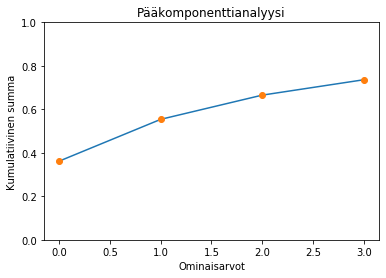

In [46]:
wine_scree_plot = np.cumsum(wine_pca.explained_variance_ratio_)
plt.plot(wine_scree_plot)
plt.plot(wine_scree_plot, 'o')
plt.ylim(0,1)
plt.xlabel('Ominaisarvot')
plt.ylabel('Kumulatiivinen summa')
plt.title('Pääkomponenttianalyysi')

In [43]:
wine_pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086]])

Text(0, 0.5, 'Toinen pääkomponentti')

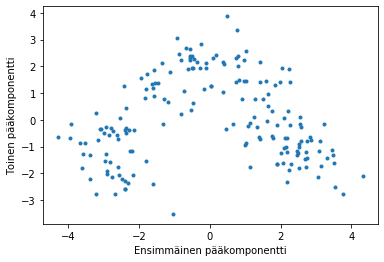

In [48]:
plt.plot(wine_projected[:,0], wine_projected[:,1], '.')
plt.xlabel('Ensimmäinen pääkomponentti')
plt.ylabel('Toinen pääkomponentti')

In [58]:
wine_projected_renamed = pd.DataFrame(wine_projected)
wine_projected_renamed.rename(columns={0:'Ensimmäinen', 1:'Toinen', 2:'Kolmas', 3:'Neljäs'}, inplace=True)

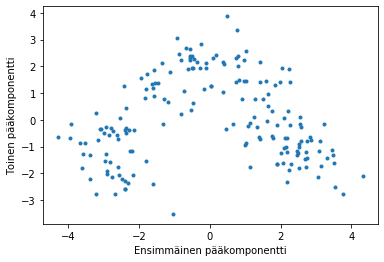

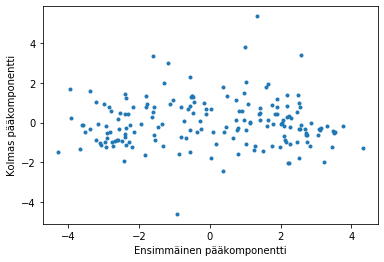

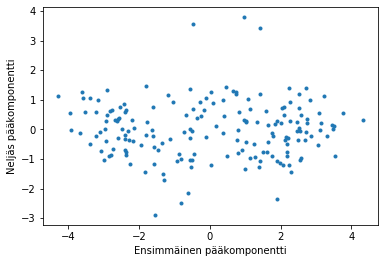

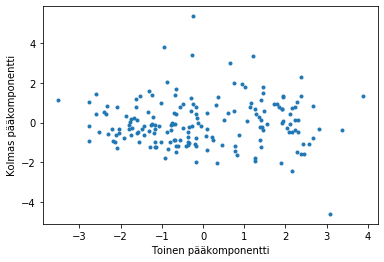

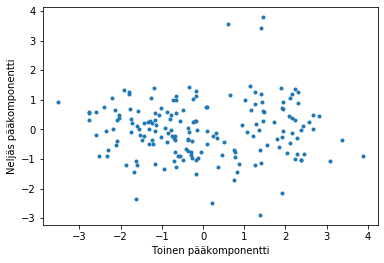

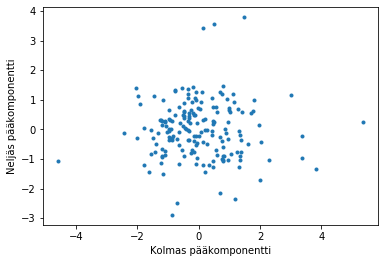

In [59]:
from itertools import combinations

for pair in combinations(wine_projected_renamed.columns, 2):
    fig, ax = plt.subplots()
    plt.plot(wine_projected_renamed[pair[0]], wine_projected_renamed[pair[1]], '.')
    plt.xlabel(str(pair[0]) + ' pääkomponentti')
    plt.ylabel(str(pair[1]) + ' pääkomponentti')